# Mothers Day Touchpoints

## Executive summary

In this notebook, I recompute the incrementality on the Retail NC and orders for Mothers Day 2024

## Config

In [53]:
import matplotlib.pyplot as  plt
# import numpy as np
import pandas as pd
# import seaborn as sns
import sys

sys.path.append('c:\\Users\\Jordi Cremades\\Documents\\Repos\\central-node')

# from utils import dataset_meta_stats
# from utils import dataset_stats
from utils import query_engines
from scipy.stats import ttest_ind

# dms = dataset_meta_stats.DatasetMetaStats() 
# ds = dataset_stats.DatasetStats()

## [X] Task 1: Different groups for MD 2024 QC_HOME_WIDGET_TOGGLE

In [10]:
q = query_engines.QueryEngines(
    query='groups_in_md2024.sql',
    params=None,
    output_file='groups_in_md2024',
    load_from_output_file=None
)

df = q.query_run_starbust()
df

c:\Users\Jordi Cremades\Documents\Repos\central-node\utils\query_engines.py:162: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/578d754cd18c8572ba29472b2147bbb9960df0aaf11f6e9a75f27d3c55986644


,variant
0,Control Group
1,forced_assignment
2,B


## [X] Task 2: Evolution of spikes during in the first_exposure table

In [15]:
q = query_engines.QueryEngines(
    query='spikes_in_md2024.sql',
    params=None,
    output_file='spikes_in_md2024',
    load_from_output_file=None
)

df = q.query_run_starbust()
df

c:\Users\Jordi Cremades\Documents\Repos\central-node\utils\query_engines.py:162: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/69e9f13cf1f3163dcd3f753fdc0b23fcedafb1afebd090fd79bcd3e76611a3f3


,p_first_exposure_date,_col1
0,2024-04-06,374165
1,2024-01-03,1283258
2,2024-01-17,568963
3,2024-05-01,601570
4,2024-03-15,215762
...,...,...
138,2024-05-14,384966
139,2024-05-16,355521
140,2024-05-12,625735
141,2024-01-25,306246


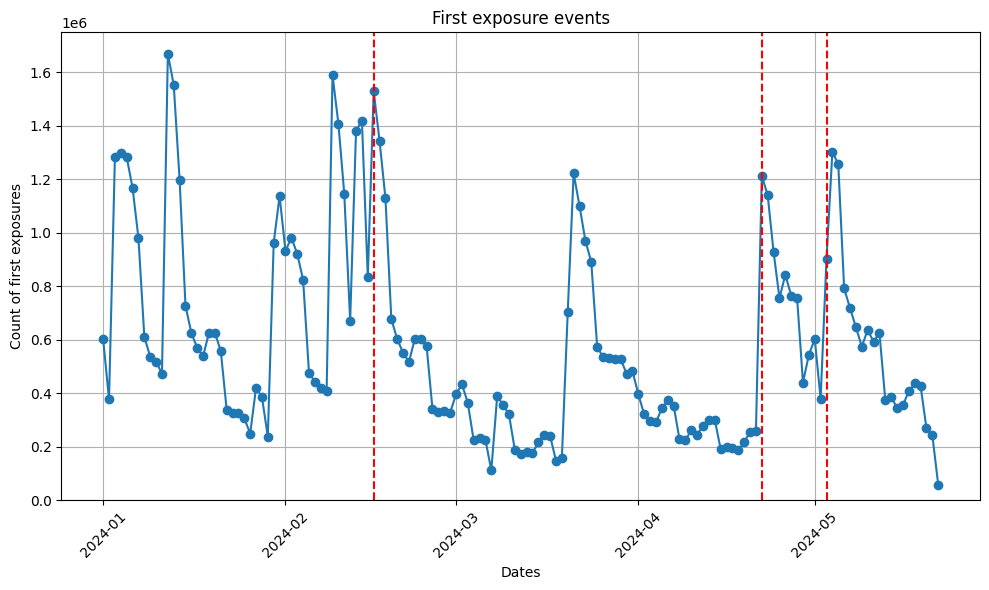

In [28]:
# Dates list
DATES = ['2024-02-16', '2024-04-22', '2024-05-03'] 

# Convert the DATES list to datetime
DATES = pd.to_datetime(DATES)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['p_first_exposure_date'], df['count_first_exposures'], marker='o', linestyle='-')

for date in DATES:
    plt.axvline(x=date, color='r', linestyle='--')

plt.title('First exposure events')
plt.xlabel('Dates')
plt.ylabel('Count of first exposures')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

## [X] Task 3: CVR% incremntality for MD 2024

In [16]:
q = query_engines.QueryEngines(
    query='md2024.sql',
    params=None,
    output_file='md2024',
    load_from_output_file=None
)

df = q.query_run_starbust()
df

c:\Users\Jordi Cremades\Documents\Repos\central-node\utils\query_engines.py:162: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/4cf3c243fd91ad3c6c64f6eee143693f13e77619b4edb5702e2c7d0db4c75535


,p_creation_date,country,variant_group,n_home_sessions,n_orders
0,2024-05-02,AD,B,164,1
1,2024-05-02,AD,Control Group,13,0
2,2024-05-02,AD,None,5,0
3,2024-05-02,AL,B,27,0
4,2024-05-02,AL,None,19,0
...,...,...,...,...,...
306,2024-05-05,UA,Control Group,8340,259
307,2024-05-05,UA,None,6337,73
308,2024-05-05,UG,B,10915,164
309,2024-05-05,UG,Control Group,827,11


In [44]:
# condition only for ES and PT
cond = df['country'].isin(['ES','PT'])
df = df[cond].copy()

# Filter out rows where variant_group is None
cond = df['variant_group'].isin(['Control Group', 'B'])
df_filtered = df[cond]

# Calculate the total sessions per date
total_sessions_per_date = df_filtered.groupby(['p_creation_date','country'])['n_home_sessions'].sum().reset_index()
total_sessions_per_date.rename(columns={'n_home_sessions': 'total_sessions'}, inplace=True)

# Merge the total sessions back to the original dataframe
df_filtered = df_filtered.merge(total_sessions_per_date, on=['p_creation_date','country'])

# Calculate the percentage of sessions
df_filtered['percentage_sessions'] = (df_filtered['n_home_sessions'] / df_filtered['total_sessions']) * 100
df_filtered


,p_creation_date,country,variant_group,n_home_sessions,n_orders,total_sessions,percentage_sessions
0,2024-05-02,ES,B,389245,5763,409826,94.978113
1,2024-05-02,ES,Control Group,20581,292,409826,5.021887
2,2024-05-02,PT,B,80017,1774,84134,95.106616
3,2024-05-02,PT,Control Group,4117,97,84134,4.893384
4,2024-05-03,ES,B,462395,6549,497878,92.873154
5,2024-05-03,ES,Control Group,35483,475,497878,7.126846
6,2024-05-03,PT,B,91303,1896,98193,92.983207
7,2024-05-03,PT,Control Group,6890,157,98193,7.016793
8,2024-05-04,ES,B,515013,10806,556433,92.556157
9,2024-05-04,ES,Control Group,41420,877,556433,7.443843


In [61]:
# Calculate CVR (Conversion Rate)
df_filtered['cvr'] = df_filtered['n_orders'] / df_filtered['n_home_sessions'] * 100

df_pivot = df_filtered.pivot_table(
    index=['p_creation_date', 'country'],
    columns='variant_group',
    values=['n_home_sessions', 'n_orders', 'cvr'],
    aggfunc='sum'
).reset_index()

# Flatten the column MultiIndex
df_pivot.columns = ['_'.join(col).strip() if col[1] else col[0] for col in df_pivot.columns.values]

# Rename columns for clarity
df_pivot.rename(columns={
    'n_home_sessions_B': 'n_home_sessions_B',
    'n_orders_B': 'n_orders_B',
    'cvr_B': 'cvr_B',
    'n_home_sessions_Control Group': 'n_home_sessions_CG',
    'n_orders_Control Group': 'n_orders_CG',
    'cvr_Control Group': 'cvr_CG'
}, inplace=True)

# Calculate the increment of CVR%
df_pivot['cvr_increment'] = ((df_pivot['cvr_B'] - df_pivot['cvr_CG']) / df_pivot['cvr_CG']) * 100

# Perform t-tests for each date and country combination
def perform_ttest(row):
    # Generate pseudo data based on summary statistics
    cvr_B = row['cvr_B'] / 100
    cvr_CG = row['cvr_CG'] / 100
    
    n_B = row['n_home_sessions_B']
    n_CG = row['n_home_sessions_CG']
    
    # Simulate orders data as Bernoulli trials (1 if an order was placed, 0 otherwise)
    orders_B = [1] * row['n_orders_B'] + [0] * (n_B - row['n_orders_B'])
    orders_CG = [1] * row['n_orders_CG'] + [0] * (n_CG - row['n_orders_CG'])
    
    # Perform t-test
    t_stat, p_value = ttest_ind(orders_B, orders_CG, equal_var=False)
    return pd.Series([p_value, p_value < 0.05], index=['p_value', 'significant'])

# Apply the t-test function
df_pivot[['p_value', 'significant']] = df_pivot.apply(perform_ttest, axis=1)

df_pivot


,p_creation_date,country,cvr_B,cvr_CG,n_home_sessions_B,n_home_sessions_CG,n_orders_B,n_orders_CG,cvr_increment,p_value,significant
0,2024-05-02,ES,1.480559,1.418784,389245,20581,5763,292,4.354023,0.465709,False
1,2024-05-02,PT,2.217029,2.356085,80017,4117,1774,97,-5.901980,0.565712,False
2,2024-05-03,ES,1.416322,1.338669,462395,35483,6549,475,5.800710,0.220928,False
3,2024-05-03,PT,2.076602,2.278665,91303,6890,1896,157,-8.867590,0.277037,False
4,2024-05-04,ES,2.098199,2.117335,515013,41420,10806,877,-0.903738,0.794608,False
5,2024-05-04,PT,2.387856,2.393776,104152,8355,2487,200,-0.247307,0.972828,False
6,2024-05-05,ES,2.442816,2.286567,652853,48938,15948,1119,6.833376,0.026073,True
7,2024-05-05,PT,3.695747,3.522714,114510,8431,4232,297,4.911932,0.406357,False
